In [22]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import pandas as pd
from netCDF4 import Dataset
import os
import glob
from datetime import datetime
import seaborn as sns
import netCDF4
from netCDF4 import Dataset
from metpy.units import units
import dask
import dask.dataframe as dd
from dask.distributed import Client
import xarray as xr

In [23]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Open BARRA datasets

In [ ]:
def open_files(variable,lat_start,lat_end,lon_start,lon_end):
    list = ["202201-202201","202202-202202","202101-202101","202102-202102","202103-202103","202104-202104","202001-202001","202002-202002",
           "202003-202003","202004-202004","201901-201901","201902-201902","201903-201903","201904-201904","201801-201801","201802-201802",
           "201803-201803","201804-201804","201701-201701","201702-201702","201703-201703","201704-201704","201601-201601","201602-201602",
           "201603-201603","201604-201604","201501-201501","201502-201502","201503-201503","201504-201504","201401-201401","201402-201402",
           "201403-201403","201404-201404","201301-201301","201302-201302","201303-201303","201304-201304","201201-201201","201202-201202",
           "201203-201203","201204-201204"
            ] #"202203-202203","202204-202204": removed as not in radar domain; barra goes back to 2007 (radar till 08-2011)
    fp = "/g/data/yb19/australian-climate-service/release/ACS-BARRA2/output/AUS-11/BOM/ECMWF-ERA5/historical/hres/BOM-BARRA-R2/v1/1hr/"+variable+"/"
    data = []
    for months in list:
        # to get specific hour, edit: u.ua850.isel(time=(barra2_202201.time.dt.hour == hour)
        var = xr.open_dataset(fp+variable+"_AUS-11_ECMWF-ERA5_historical_hres_BOM-BARRA-R2_v1_1hr_"+months+".nc", engine="h5netcdf",chunks="auto")#{'time':-1})
        mean = var[variable].sel(lat=slice(lat_start,lat_end),lon=slice(lon_start,lon_end))
        var_mean = mean.mean(dim=["lat","lon"])    
        data.append(var_mean)
    return data 

In [25]:
# 850hPa variables
ua850 = open_files("ua850",-20.768799,-18.0708,145.12054,147.9812) #townsville
va850 = open_files("va850",-20.768799,-18.0708,145.12054,147.9812) #townsville
hus850 = open_files("hus850",-20.768799,-18.0708,145.12054,147.9812) #townsville
ta850 = open_files("ta850",-20.768799,-18.0708,145.12054,147.9812) #townsville

## cloud fraction - a parametrized sub-grid process
# ll_cloud_area_file = open_files("cll",-20.768799,-18.0708,145.12054,147.9812) #townsville
# ml_cloud_area_file = open_files("clm",-20.768799,-18.0708,145.12054,147.9812) #townsville
# hl_cloud_area_file = open_files("clh",-20.768799,-18.0708,145.12054,147.9812) #townsville
# tot_cloud_area_file = open_files("clt",-20.768799,-18.0708,145.12054,147.9812) #townsville
# ll_cloud_area_file = open_files("cll",-17.636353,-14.938416,148.55927,151.36993) #willis island
# ml_cloud_area_file = open_files("clm",-17.636353,-14.938416,148.55927,151.36993) #willis island
# hl_cloud_area_file = open_files("clh",-17.636353,-14.938416,148.55927,151.36993) #willis island
# tot_cloud_area_file = open_files("clt",-17.636353,-14.938416,148.55927,151.36993) #willis island

In [26]:
%%time
u = ua850
concat_u = xr.concat([u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8],u[9],u[10],u[11],u[12],u[13],u[14],u[15],u[16],u[17],u[18],u[19],u[20],
                      u[21],u[22],u[23],u[24],u[25],u[26],u[27],u[28],u[29],u[30],u[31],u[32],u[33],u[34],u[35],u[36],u[37],u[38],u[39],u[40],
                      u[41]],"time")
v = va850
concat_v = xr.concat([v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],v[16],v[17],v[18],v[19],v[20],
                      v[21],v[22],v[23],v[24],v[25],v[26],v[27],v[28],v[29],v[30],v[31],v[32],v[33],v[34],v[35],v[36],v[37],v[38],v[39],v[40],
                      v[41]],"time")
r = hus850
concat_r = xr.concat([r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11],r[12],r[13],r[14],r[15],r[16],r[17],r[18],r[19],r[20],
                      r[21],r[22],r[23],r[24],r[25],r[26],r[27],r[28],r[29],
                     r[30],r[31],r[32],r[33],r[34],r[35],r[36],r[37],r[38],r[39],r[40],r[41]],"time")
t = ta850
concat_t = xr.concat([t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14],t[15],t[16],t[17],t[18],t[19],t[20],
                      t[21],t[22],t[23],t[24],t[25],t[26],t[27],t[28],t[29],t[30],t[31],t[32],t[33],t[34],t[35],t[36],t[37],t[38],t[39],t[40],
                      t[41]],"time")

CPU times: user 912 ms, sys: 131 ms, total: 1.04 s
Wall time: 1.96 s


In [ ]:
# c = ll_cloud_area_file
# cloud_area_ll = xr.concat([r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11],r[12],r[13],r[14],r[15],r[16],r[17],r[18],r[19],r[20],r[21],r[22],r[23],r[24],r[25],r[26],r[27],r[28],r[29],
#                            r[30],r[31],r[32],r[33],r[34],r[35],r[36],r[37],r[38],r[39],r[40],r[41]],"time")
# c = ml_cloud_area_file
# cloud_area_ml = xr.concat([r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11],r[12],r[13],r[14],r[15],r[16],r[17],r[18],r[19],r[20],r[21],r[22],r[23],r[24],r[25],r[26],r[27],r[28],r[29],
#                            r[30],r[31],r[32],r[33],r[34],r[35],r[36],r[37],r[38],r[39],r[40],r[41]],"time")
# c = hl_cloud_area_file
# cloud_area_hl = xr.concat([r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11],r[12],r[13],r[14],r[15],r[16],r[17],r[18],r[19],r[20],r[21],r[22],r[23],r[24],r[25],r[26],r[27],r[28],r[29],
#                            r[30],r[31],r[32],r[33],r[34],r[35],r[36],r[37],r[38],r[39],r[40],r[41]],"time")
# c = tot_cloud_area_file
# cloud_area_tot = xr.concat([r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11],r[12],r[13],r[14],r[15],r[16],r[17],r[18],r[19],r[20],r[21],r[22],r[23],r[24],r[25],r[26],r[27],r[28],r[29],
#                            r[30],r[31],r[32],r[33],r[34],r[35],r[36],r[37],r[38],r[39],r[40],r[41]],"time")

In [27]:
%%time
rr = (concat_r * units("1")).compute()
uu = (concat_u * units("m/s")).compute()
vv = (concat_v * units("m/s")).compute()
tt = (concat_t * units("K")).compute()
# cldfr_ll = (cloud_area_ll * units("%")).compute()
# cldfr_ml = (cloud_area_ml * units("%")).compute()
# cldfr_hl = (cloud_area_hl * units("%")).compute()
# cldfr_tot = (cloud_area_tot * units("%")).compute()

CPU times: user 27min 46s, sys: 2min 38s, total: 30min 24s
Wall time: 37min 27s


In [28]:
wind_dir = metpy.calc.wind_direction(uu, vv, convention='from')
wind_speed = metpy.calc.wind_speed(uu, vv)
wind_dir.persist()
wind_speed.persist()

Magnitude,[4.278405666351318 4.565334320068359 4.986744403839111 ... 6.238915920257568 6.494290828704834 6.433870792388916]
Units,meter/second


In [76]:
%%time
NE = wind_dir[(wind_dir>0*units("degree"))&(wind_dir<90*units("degree"))]
SE = wind_dir[(wind_dir>90*units("degree"))&(wind_dir<180*units("degree"))]
SW = wind_dir[(wind_dir>180*units("degree"))&(wind_dir<270*units("degree"))]
NW = wind_dir[(wind_dir>270*units("degree"))&(wind_dir<360*units("degree"))]

# hourly_grouped_rr = rr.groupby(rr.time.dt.hour)
# hourly_grouped_tt = tt.groupby(tt.time.dt.hour)
hourly_grouped_wind_dirNE = NE.groupby(NE.time.dt.hour)
hourly_grouped_wind_dirSE = SE.groupby(SE.time.dt.hour)

hourly_grouped_wind_dir = wind_dir.groupby(wind_dir.time.dt.hour)

hourly_grouped_wind_dirSW = SW.groupby(SW.time.dt.hour)
hourly_grouped_wind_dirNW = NW.groupby(NW.time.dt.hour)

# hourly_grouped_wind_speed = wind_speed.groupby(wind_speed.time.dt.hour)
var1 = []
for hours in np.arange(0,24,1):
    cld_fr_mean = hourly_grouped_wind_dirNE[hours].mean(dim=["time"],skipna=True)
    var1.append(cld_fr_mean.values)
    
var2 = []
for hours in np.arange(0,24,1):
    cld_fr_mean = hourly_grouped_wind_dirSE[hours].mean(dim=["time"],skipna=True)
    var2.append(cld_fr_mean.values)

var3 = []
for hours in np.arange(0,24,1):
    cld_fr_mean = hourly_grouped_wind_dir[hours].mean(dim=["time"],skipna=True)
    var3.append(cld_fr_mean.values)
    
var4 = []
for hours in np.arange(0,24,1):
    SW = hourly_grouped_wind_dirSW[hours].mean(dim=["time"],skipna=True)
    var4.append(SW.values)
    
var5 = []
for hours in np.arange(0,24,1):
    cld_fr_mean = hourly_grouped_wind_dirNW[hours].mean(dim=["time"],skipna=True)
    var5.append(cld_fr_mean.values)

CPU times: user 153 ms, sys: 9.13 ms, total: 162 ms
Wall time: 160 ms


In [77]:
NE_roll = np.roll(var1, shift=10)
SE_roll = np.roll(var2, shift=10)
tot_roll = np.roll(var3, shift=10)
SW_roll = np.roll(var4, shift=10)
NW_roll = np.roll(var5, shift=10)

In [78]:
NW_roll

array([316.84927, 313.901  , 313.51315, 312.8633 , 314.67993, 314.43546,
       312.12186, 318.87427, 314.44406, 315.40967, 311.36377, 308.91803,
       311.10773, 310.90707, 311.59906, 310.51617, 312.1356 , 307.0784 ,
       304.70825, 313.8156 , 314.19492, 310.989  , 313.0286 , 314.32733],
      dtype=float32)

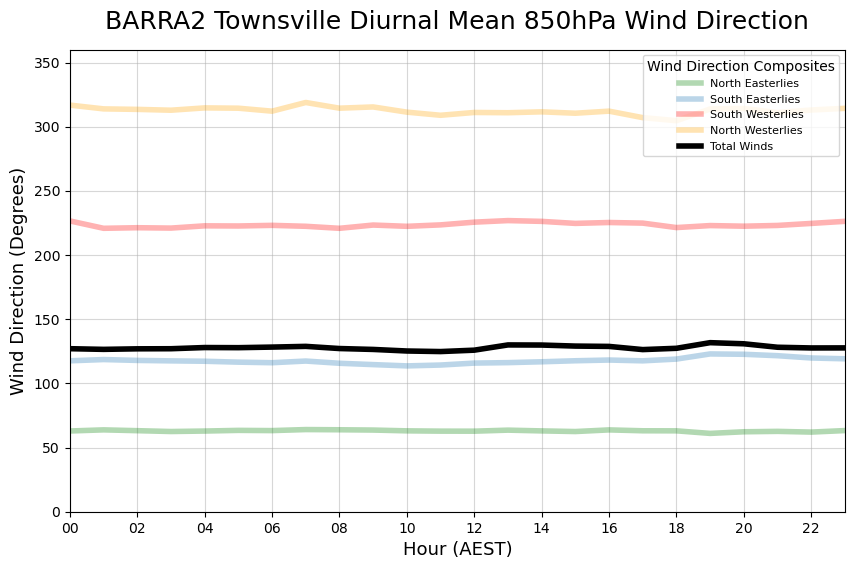

In [89]:
UTC = np.arange(0,24,1) #["00","03","06","09","12","15","18","21"]

fig = plt.figure(1, figsize=[10,6])
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1)

ax.plot(UTC,NE_roll,color="green",linewidth=4,label='North Easterlies',alpha=0.3)
ax.plot(UTC,SE_roll,linewidth=4,label='South Easterlies',alpha=0.3)
ax.plot(UTC,SW_roll,color="red",linewidth=4,label='South Westerlies',alpha=0.3)
ax.plot(UTC,NW_roll,color="orange",linewidth=4,label='North Westerlies',alpha=0.3)
ax.plot(UTC,tot_roll,color="black",linewidth=4,label='Total Winds')

# ax.plot(UTC,cld_fr_ml_roll,color="red",linewidth=4,alpha=0.5) #,label='Mid level'
# ax.plot(UTC,cld_fr_hl_roll,linewidth=4,alpha=1) #label='High level',
# ax.plot(UTC,cld_fr_tot_roll,color="black",linewidth=4,label='Total',alpha=1)
plt.legend(loc='upper right', title='Wind Direction Composites',fontsize=8)

ax.set_title("BARRA2 Townsville Diurnal Mean 850hPa Wind Direction",fontsize=18,pad=15)
ax.set_ylabel("Wind Direction (Degrees)",fontsize=13)
ax.set_xlabel("Hour (AEST)",fontsize=13)
ax.set_ylim(0,360)
ax.set_xlim(0,23)
ax.set_xticks(np.arange(0,24,2))
ax.set_xticklabels(["00","02","04","06","08","10","12","14","16","18","20","22"])
ax.grid(alpha=0.5);